In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
df = pd.read_csv('company_sales_data.csv', sep =',')
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


### <span style='color:blue'> Question 1. Compare any two products sales data using a bar chart</span>

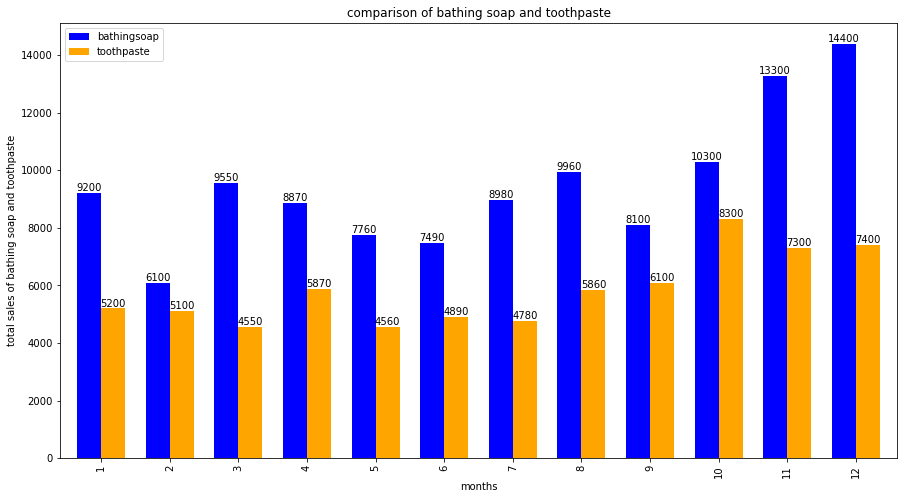

In [196]:
ax = df.plot.bar(x = 'month_number', y=['bathingsoap', 'toothpaste'], figsize = (15,8),  width = 0.7, color=['blue', 'orange'])
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc = 'upper left')
plt.title("comparison of bathing soap and toothpaste")
plt.xlabel('months')
plt.ylabel("total sales of bathing soap and toothpaste")
plt.savefig('two_products_sales.png')
plt.show()

### <span style='color:blue'> Question 2. Assuming the average monthly sales of bathing soap is 10k, visualize the sales data of bathing soap of all months, showing how they differ from the average sale</span>

In [187]:
#using numpy to generate the average monthly sales of bathing soap
average_sales = np.full(shape=12,fill_value=10000,dtype=np.int)
average_sales



array([10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,
       10000, 10000, 10000])

In [199]:
#inputting the average_sales into the dataframe
df['average_s_bathingSoap''] = average_sales
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit,average_sales,average_sales_of_bs
0,1,2500,1500,5200,9200,1200,1500,21100,211000,10000,10000
1,2,2630,1200,5100,6100,2100,1200,18330,183300,10000,10000
2,3,2140,1340,4550,9550,3550,1340,22470,224700,10000,10000
3,4,3400,1130,5870,8870,1870,1130,22270,222700,10000,10000
4,5,3600,1740,4560,7760,1560,1740,20960,209600,10000,10000
5,6,2760,1555,4890,7490,1890,1555,20140,201400,10000,10000
6,7,2980,1120,4780,8980,1780,1120,29550,295500,10000,10000
7,8,3700,1400,5860,9960,2860,1400,36140,361400,10000,10000
8,9,3540,1780,6100,8100,2100,1780,23400,234000,10000,10000
9,10,1990,1890,8300,10300,2300,1890,26670,266700,10000,10000


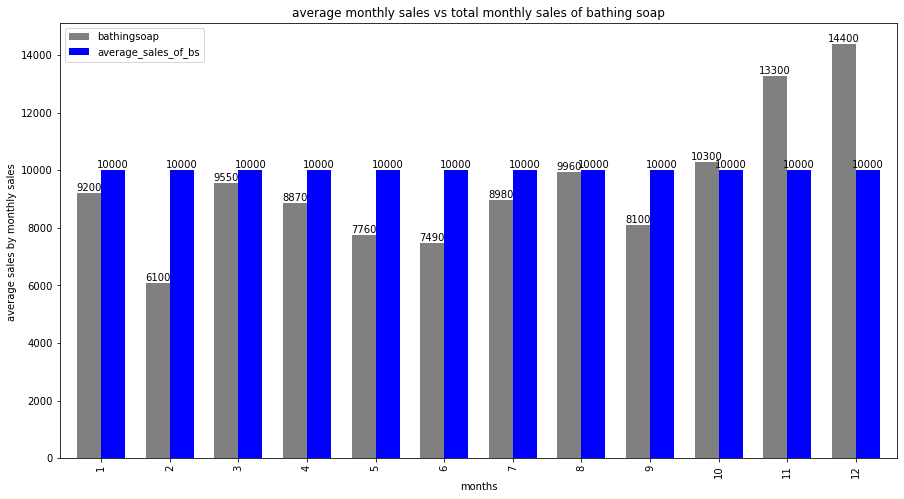

In [200]:
#plotting the graph
x = 'month_number'
y = ['bathingsoap', 'average_s_bathingSoap' ]
ax = df.plot.bar(x, y, figsize = (15,8),  width = 0.7,  color=['grey', 'blue'])
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc = 'upper left')
plt.title("average monthly sales vs total monthly sales of bathing soap")
plt.xlabel('months')
plt.ylabel("average sales by monthly sales ")
plt.savefig('average vs total monthly sales.png')
plt.show()

### <span style='color:blue'> Question 3. Calculate the total sales data for the year of  each product and represent it on a pie chart</span>

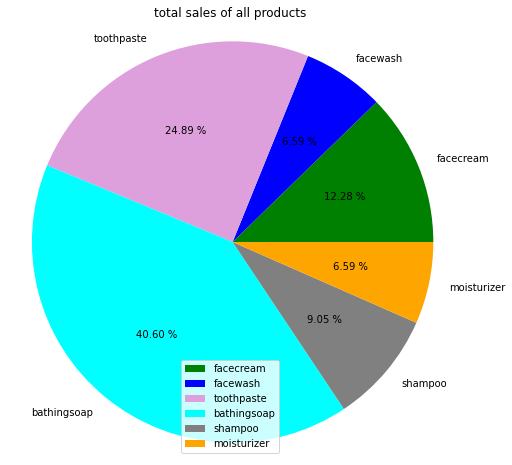

In [181]:
fig = plt.gcf()
fig.set_size_inches(8,8) 
all_products = ['facecream', 'facewash', 'toothpaste', 'bathingsoap','shampoo','moisturizer']
product_sales = [df['facecream'].sum(), df['facewash'].sum(), df['toothpaste'].sum(), 
                df['bathingsoap'].sum(), df['shampoo'].sum(), df['moisturizer'].sum()]
plt.pie(product_sales, labels=all_products,autopct='%.2f %%', 
    colors= ['green','blue','plum', 'cyan','gray', 'orange'])
plt.title('total sales of all products')
plt.axis('equal')
plt.legend(loc = 'lower center')
plt.savefig('total sales of each product.png')
plt.show()